## COMP3670/6670 Programming Assignment 2 - Clustering, Linear Regression and Gradient Descent
---

**Enter Your Student ID:**u7523842

**Your Name:**Soo-ah Kim
    
**Deadline:** 18, September, 2022

**Submit:** Write your answers in this file, and submit a single Jupyter Notebook file (.ipynb) on Wattle. Rename this file with your student number as 'uXXXXXXX.ipynb'. Note: you don't need to submit the .png or .npy files. 

**Enter Discussion Partner IDs Below:**
You could add more IDs with the same markdown format above.

**Programming Section**:
- Task 1.1 - 1.3: 30%
- Task 1.4: 40%
- Task 2: 30%

In [1]:
import time
import sys
! pip install numpy
import numpy as np
! pip install matplotlib
import matplotlib.pyplot as plt
import math
import os
from matplotlib.pyplot import imread
! pip install patchify
from patchify import patchify

np.random.seed(1)


## Task1: Clustering and Bag of Visual Words
-----------
These programming exercises will focus on K-means clustering. 

If you're unsure of how k-means works, read this very helpful and freely available online breakdown from Stanford's CS221 course; https://stanford.edu/~cpiech/cs221/handouts/kmeans.html

This assignment requires you to loosely interpret how k-means is a specific case of a more general algorithm named Expectation Maximisation. This is explained toward the end of the above article.

First, lets loading the dataset.

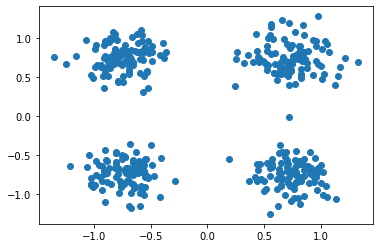

In [2]:
X = np.load("./data_clustering.npy")
plt.scatter(X[:,0], X[:,1])
plt.show()

K-means is a special, simple case of the Expectation Maximisation (EM) algorithm.

This simplified EM (k-means), is divided into two steps.

The **E-Step**, where for every sample in your dataset you find which "centroid" that datapoint is closest to that sample, and record that information.

The **M-Step**, where you move each "centroid" to the center of the samples which were found to be closest to it in the **E-Step**.

Each *centroid* is simply an estimated mean of a cluster. If you have $1$ centroid, then this centroid will become the mean of all your data.

Centroids are initially random values, and the k-means algorithm attempts to modify them so that each one represents the center of a cluster.

We have implemented a centroids initialization function.

In [3]:
def initialise_parameters(m, X):
    C = X[np.random.choice(X.shape[0], m)]
    return C

C = initialise_parameters(4, X)
print(C)

[[ 0.55638768  1.19083041]
 [ 0.99468733 -0.63105385]
 [-0.80861347 -0.47487527]
 [ 0.83443335  0.7038998 ]]


Now let's implement K-Means algorithm.

---
   **TASK 1.1:** Create a function $E\_step(C, X) = L$, where $L$ is a matrix of the same dimension of the dataset $X$.
   
   This function is is the **E-Step** (or "assignment step") mentioned earlier.

---

**HINT:** 
- https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
- https://en.wikipedia.org/wiki/K-means_clustering#Standard_algorithm
- Each row of $L$ is a centroid taken from $C$.

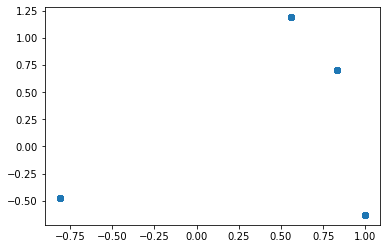

In [4]:
def E_step(C, X):
    # YOUR CODE HERE
    arrayL = np.empty((len(X),2), float)
    itr = -1
    for i in X:
        itr += 1
        centroid = C[0]
        distance = (X[itr][0]-C[0][0])**2 + (X[itr][1]-C[0][1])**2
        for j in range(1,len(C)):
            dist1 = (X[itr][0]-C[j][0])**2 + (X[itr][1]-C[j][1])**2
            if dist1 < distance:
                centroid = C[j]
                distance = dist1
        #print(centroid)
        arrayL[itr] = centroid
        #print(X[itr], L[itr])

    #print(arrayL)
                
    return arrayL
    
L = E_step(C, X)
plt.scatter(L[:, 0], L[:, 1])
plt.show()

**TASK 1.2:** Create a function $M\_step(C, X, L) = C$ which returns $C$ modified so that each centroid in $C$ is placed in the middle of the samples assigned to it. This is the **M-Step**.

In other words, make each centroid in $C$ the average of all the samples which were found to be closest to it during the **E-step**. This is also called the "update step" for K-means.

---

**HINT:** https://docs.scipy.org/doc/numpy/reference/generated/numpy.array_equal.html

In [5]:
def M_step(C, X, L):
    # YOUR CODE HERE
    newC = np.empty((len(C), 2),float)
    for i in range (len(C)):
        xsum = 0
        ysum = 0
        count = 0
        for j in range(len(X)):
            if (L[j][0] == C[i][0] and L[j][1] == C[i][1]):
                xsum += X[j][0]
                ysum += X[j][1]
                count += 1
        if count != 0:
            xmean = xsum / count
            ymean = ysum / count
            newC[i][0] = xmean
            newC[i][1] = ymean
    return newC
    pass

print('Before:')
print(C)
print('\nAfter:')
new_C = M_step(C, X, L)
print(new_C)

Before:
[[ 0.55638768  1.19083041]
 [ 0.99468733 -0.63105385]
 [-0.80861347 -0.47487527]
 [ 0.83443335  0.7038998 ]]

After:
[[-0.18550673  0.94593855]
 [ 0.74859936 -0.74619961]
 [-0.76830416 -0.16807746]
 [ 0.75645564  0.69249107]]


**TASK 1.3:** Implement $kmeans(X, m, threshold) = C, L$ which takes a dataset $X$ (of any dimension) and a scalar value $m$ and a scalar $threshold$ as input. This function uses the 3 functions you wrote previously to:
- generate $m$ centroids.
- iterate between the E and M steps until the difference of loss values between two iterations is less than the threshold to classify the $m$ clusters.

...and then returns:
- $C$, the centers of the $m$ clusters after convergence.
- $L$, the labels (centroid vectors) assigned to each sample in the dataset after convergence.
---
**HINT:** Using initialise_parameters to initial centroid

Initial Parameters:
[[ 0.55638768  1.19083041]
 [ 0.99468733 -0.63105385]
 [-0.80861347 -0.47487527]
 [ 0.83443335  0.7038998 ]]

Final Parameters:
[[ 0.72539561  0.75302836]
 [-0.73312486 -0.73655558]
 [ 0.74859936 -0.74619961]
 [-0.74965351  0.7531092 ]]


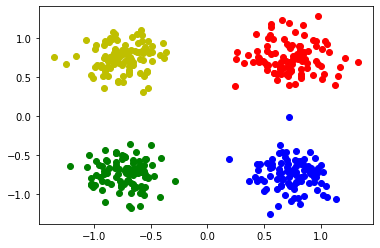

In [6]:
def kmeans(X, m, threshold):
    # YOUR CODE HERE
        
    #initialisation
    C = initialise_parameters(m, X)
    
    #1 iteration
    L= E_step(C,X)
    C = M_step(C, X, L)
    loss = 0
    for j in range (len(X)):
        loss += ((X[j][0] - L[j][0])**2+(X[j][1] - L[j][1])**2)
    MSE1 = loss / len(X)
    
    #2 iterations
    L= E_step(C,X)
    C = M_step(C, X, L)
    loss = 0
    for j in range (len(X)):
        loss += ((X[j][0] - L[j][0])**2+(X[j][1] - L[j][1])**2)
    MSE2 = loss / len(X)
    
    #more iterations
    while ((MSE1 - MSE2) >= threshold):
        MSE1 = MSE2
    
        L = E_step(C, X)
        C = M_step(C, X, L)
        
        loss = 0
        for j in range (len(X)):
            loss += ((X[j][0] - L[j][0])**2+(X[j][1] - L[j][1])**2)
        MSE2 = loss / len(X)
        diff = MSE2 - MSE1
    return C, L
    pass

#CODE TO DISPLAY YOUR RESULTS. DO NOT MODIFY.
C_final, L_final = kmeans(X, 4, 1e-6)
print('Initial Parameters:')
print(C)
print('\nFinal Parameters:')
print(C_final)

def allocator(X, L, c):
    cluster = []
    for i in range(L.shape[0]):
        if np.array_equal(L[i, :], c):
            cluster.append(X[i, :])
    return np.asarray(cluster)

colours = ['r', 'g', 'b', 'y']
for i in range(4):
    cluster = allocator(X, L_final, C_final[i, :])
    plt.scatter(cluster[:,0], cluster[:,1], c=colours[i])

plt.show()

Your answer should like this, maybe with different colors:
![image](./cluster.png)

**TASK 1.4:** Implement Bag of Visual Words (BOVW) to perform pedestrian retrieval. See more information at:

https://en.wikipedia.org/wiki/Bag-of-words_model

https://en.wikipedia.org/wiki/Bag-of-words_model_in_computer_vision

First, let's understand the settings of datasets.

---
We provide you with 3 pedestrian image folders, 'train', 'gallery', and 'val_query'. There are 99 images in 'train' which are used to create a vocabulary through clustering. 'Gallery' contains 90 images which belong to 15 different pedestrians. If two images' file name have same first four digits, then these two images belong to same pedestrian. When we randomly select a query image from 'val_query', we aim to find the images from the 'gallery' that contain the same person as the query. Let's load the images in 'train' and visualise an example.

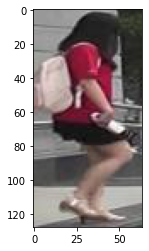

In [7]:
train_images = []
for file in os.listdir("./train"):
    if file.endswith(".jpg"):
        im = imread("./train/" + file)
        train_images.append(im)
        assert im.shape == (128, 64, 3)
plt.imshow(train_images[0])
plt.show()

To generate the vocabulary, the first step is computing local image features. For simplicity, patches of size 8×8 are densely sampled, and we use these patches for local feature extraction. The sampling step is 8, so there is no overlapping between patches. 

Before splitting, the image size is (128, 64, 3)
After splitting, the patches are (128, 8, 8, 3)
A patch is like:


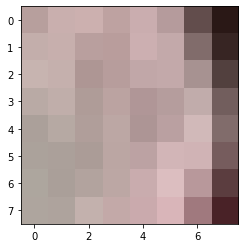

In [8]:
def patchify_images(image):
    return patchify(image, (8, 8, 3), step=8).reshape((-1, 8, 8, 3))

patches = patchify_images(train_images[0])
print(f'Before splitting, the image size is {train_images[0].shape}')
print(f'After splitting, the patches are {patches.shape}')
print('A patch is like:')
plt.imshow(patches[50])
plt.show()
#print(patches[50])
#print(patches[50][0][0][1])

Then you need to implement your feature extractor to compute the feature of an image patch. Complete the function

$$compute\_patch\_feature(patch) = patch\_feature$$

**Requirements:** 
- You are not allowed to import any other packages except Numpy and Scipy. (Your are allowed to import packages in Numpy or Scipy, such as scipy.signal). 
- You can find inspiration from internet. However, you have to code by yourself. Hint: color feature might be a useful option.
- Your implementation for feature extraction of a patch should be of reasonable speed, e.g., within a second. You will have 0 if your algorithm takes too much time to run.

In [9]:
def compute_patch_feature(patch):
    #YOUR CODE HERE
    
    #red
    red = 0
    for i in range (8):
        for j in range (8):
            red += patch[i][j][0]
    Rmean = red / 64
    
    #green
    green = 0
    for i in range (8):
        for j in range (8):
            green += patch[i][j][1]
    Gmean = green / 64        
    
    #blue
    blue = 0
    for i in range (8):
        for j in range (8):
            blue += patch[i][j][2]
    Bmean = blue / 64
    
    feature = np.array([Rmean, Gmean, Bmean])
    return feature
    
    pass



start = time.time()
print(f'The shape of the feature of a patch is :{compute_patch_feature(patches[50]).shape} in my implementation.')
end = time.time()
print(f'It takes {end-start} seconds to compute the feature for one image patch.')

The shape of the feature of a patch is :(3,) in my implementation.
It takes 0.0009982585906982422 seconds to compute the feature for one image patch.


Now, you can create the vocabulary from patch features in the 'train' folder. Complete the function

$$create\_vocabulary(train\_images) = vocabulary$$

**HINT:** 
- Remember to call the functions you defined in Task 1.1, 1.2 and 1.3.
- You are free to decide the size of vocabulary as long as it can be generated within 2 minutes.
- It is NOT allowed to use 'gallary' or 'val_query' images for vocabulary training. You will have 0 for Task 1.4 if you use them.
- It is NOT allowed to use external images (e.g., those from the web), either. 

In [10]:
def create_vocabulary(train_images):
    #YOUR CODE HERE
    
    def initialise_centroids(m):
        CentArray = np.empty((m, 3),float)
        for i in range (m):
            for j in range (3):
                CentArray[i][j] = np.random.uniform(0, 225)
        return CentArray
    #print("centroids ", initialise_centroids(10))
             
    k = 20
    C = initialise_centroids(k)
    
    
    
    
    
    for i in range (len(train_images)):
        patches = patchify_images(train_images[i])
        for j in range (len(patches)):
            print(compute_patch_feature(patches[j]))
            
            
            
            
            
            
        #print(len(patches))
        #print(i, compute_patch_feature(patches))
        #for j in range (8):
            #for k in range (8):
                #print(compute_patch_feature(patches))
    
    pass


start = time.time()
vocabulary = create_vocabulary(train_images)
end = time.time()
print(f'The shape of my vocabulary is {vocabulary.shape}.')
print(f'It takes {end-start} seconds to generate the vocabulary.' )

[152.875 152.875 152.875]
[153. 153. 153.]
[157. 157. 157.]
[122.046875 122.046875 122.046875]
[69.96875 69.96875 69.96875]
[84.984375 84.984375 84.984375]
[63.015625 65.828125 57.671875]
[49.953125 53.453125 41.296875]
[150.015625 150.015625 150.015625]
[149.9375 149.9375 149.9375]
[137. 137. 137.]
[35.96875 35.96875 35.96875]
[34. 34. 34.]
[36.984375 36.984375 36.984375]
[43.984375 46.796875 38.640625]
[51.046875 54.546875 42.390625]
[156.359375 156.015625 155.484375]
[150.078125 150.046875 149.546875]
[61.796875 48.625    52.515625]
[101.15625   51.921875  63.9375  ]
[79.46875  40.296875 49.0625  ]
[45.484375 41.859375 42.421875]
[57.03125 57.03125 56.53125]
[41.    41.875 36.875]
[153.96875 154.6875  149.84375]
[172.890625 164.59375  162.78125 ]
[115.046875  65.9375    77.90625 ]
[146.734375  23.328125  56.53125 ]
[164.359375  46.8125    73.640625]
[68.828125 41.9375   50.890625]
[83.  83.  82.5]
[38.    38.875 33.875]
[175.203125 163.96875  161.25    ]
[208.171875 188.828125 183.7

[111.5      110.109375 114.453125]
[139.96875 139.59375 141.96875]
[139.984375 139.609375 141.984375]
[141. 141. 141.]
[148.03125 148.03125 148.03125]
[139.46875  138.90625  138.515625]
[91.1875   90.921875 90.515625]
[82.28125 81.78125 82.03125]
[126.203125 125.703125 125.953125]
[145.984375 145.984375 145.984375]
[147. 147. 147.]
[140.96875 140.96875 140.96875]
[151.015625 151.015625 151.015625]
[121.078125 117.25     113.90625 ]
[67.984375 55.296875 54.90625 ]
[40.125 35.625 37.   ]
[60.09375 55.59375 56.96875]
[150.96875 150.96875 150.96875]
[153.984375 153.984375 153.984375]
[130.21875  131.546875 130.015625]
[145.484375 143.078125 143.34375 ]
[133.015625 117.59375  116.359375]
[107.015625  78.84375   77.21875 ]
[76.765625 57.875    53.421875]
[41.125    33.6875   33.515625]
[98.90625 91.84375 91.46875]
[143.28125 144.8125  141.5    ]
[77.53125  72.140625 65.3125  ]
[141.34375  124.125    112.890625]
[68.4375  52.34375 51.     ]
[80.953125 69.21875  70.640625]
[122.625    103.8593

[140.015625 140.015625 140.015625]
[111.328125  98.203125  87.765625]
[101.671875  94.90625   94.828125]
[106.375    111.625    119.015625]
[122.34375  127.015625 138.734375]
[122.75  130.125 138.25 ]
[113.40625 109.90625 109.78125]
[149.390625 140.90625  137.234375]
[145.46875  145.15625  142.359375]
[136.765625 130.046875 129.9375  ]
[90.109375 91.25     92.328125]
[77.484375 79.03125  83.21875 ]
[89.453125 90.296875 98.9375  ]
[ 98.734375 106.109375 114.234375]
[97.359375 93.859375 93.734375]
[145.9375   129.703125 124.203125]
[157.203125 148.96875  145.140625]
[140.84375  126.359375 119.765625]
[93.109375 91.25     84.390625]
[104.140625 104.4375   110.25    ]
[104.125    104.421875 110.234375]
[113.921875 107.734375 102.765625]
[110.03125   99.96875   91.890625]
[108.859375  98.078125  95.09375 ]
[163.34375 153.      150.75   ]
[116.5625   104.84375   84.671875]
[81.046875 70.875    63.125   ]
[84.5625   74.921875 67.796875]
[58.453125 48.8125   41.6875  ]
[83.90625  70.078125 59.

[81. 81. 81.]
[136.984375 136.984375 136.984375]
[128.03125 128.03125 128.03125]
[159. 160. 162.]
[155.09375 156.09375 158.09375]
[83.046875 83.046875 83.046875]
[43.046875 43.046875 43.046875]
[65. 65. 65.]
[70. 70. 70.]
[128.015625 128.015625 128.015625]
[127.984375 127.984375 127.984375]
[161.046875 162.046875 164.046875]
[159.9375 160.9375 162.9375]
[139. 139. 139.]
[42. 42. 42.]
[92.8125 95.0625 93.3125]
[89.765625 92.015625 90.265625]
[132.96875  131.390625 131.515625]
[138.953125 137.9375   133.609375]
[142.25 141.75 142.  ]
[154.296875 153.796875 154.046875]
[164.21875 163.96875 163.46875]
[122.296875 122.046875 121.546875]
[145.28125 144.65625 136.78125]
[152.203125 151.578125 143.703125]
[158.9375   159.453125 146.390625]
[139.96875 139.90625 131.28125]
[66.15625 61.65625 63.03125]
[91.109375 86.609375 87.984375]
[94.140625 90.140625 86.890625]
[153.171875 149.171875 145.921875]
[46.953125 44.953125 45.953125]
[63.984375 61.984375 62.984375]
[89.515625 84.703125 83.796875]
[9

[99.984375 99.984375 99.984375]
[121.046875 121.046875 121.046875]
[136.984375 130.984375 132.984375]
[154.984375 148.984375 150.984375]
[129.03125 127.03125 128.03125]
[129.984375 127.984375 128.984375]
[134.953125 128.953125 130.953125]
[106.015625 100.015625 102.015625]
[138.015625 138.015625 138.015625]
[124.03125 124.03125 124.03125]
[154.0625 149.5625 150.9375]
[150.171875 145.671875 147.046875]
[129.96875 125.96875 126.96875]
[134.984375 130.984375 131.984375]
[151.765625 144.59375  146.96875 ]
[159.4375   148.109375 152.03125 ]
[121.015625 121.015625 121.015625]
[116.03125 116.03125 116.03125]
[125.25 124.75 125.  ]
[119.203125 118.703125 118.953125]
[118.984375 114.984375 115.984375]
[135.03125 131.03125 132.03125]
[132.765625 130.078125 131.      ]
[131.71875 124.625   126.96875]
[149.96875 149.96875 149.96875]
[127.984375 127.984375 127.984375]
[72.0625   66.390625 65.359375]
[67.734375 62.484375 61.421875]
[136.578125 134.15625  134.984375]
[156.015625 157.421875 157.015625

[ 47.140625  82.234375 120.53125 ]
[ 77.       162.25     225.265625]
[ 35.609375 129.203125 205.546875]
[ 45.59375  120.25     192.578125]
[ 38.1875   120.171875 188.421875]
[ 50.09375  159.296875 223.46875 ]
[ 59.875   142.59375 206.15625]
[20.796875 46.96875  80.890625]
[113.046875 102.796875 104.5625  ]
[ 80.046875 103.34375  117.3125  ]
[ 22.578125  89.1875   140.125   ]
[ 56.921875 154.609375 229.59375 ]
[ 37.578125 111.46875  182.84375 ]
[ 53.       136.953125 201.078125]
[ 59.53125 125.9375  186.75   ]
[22.15625  41.640625 69.59375 ]
[106.5625    88.5       72.140625]
[33.5      36.96875  37.609375]
[ 25.21875   79.296875 113.484375]
[ 47.984375 157.328125 230.15625 ]
[ 64.       159.984375 236.015625]
[ 35.640625 100.78125  163.171875]
[ 48.484375  90.234375 136.546875]
[24.8125   36.921875 60.109375]
[42.84375  30.578125 28.484375]
[24.8125   34.140625 49.03125 ]
[ 55.40625  117.484375 153.25    ]
[ 52.65625  161.828125 230.171875]
[ 56.140625 161.125    234.21875 ]
[ 61.    

[121.421875 123.015625 127.375   ]
[76.234375 74.328125 83.484375]
[109.140625 103.78125  110.125   ]
[163.578125 149.03125  145.4375  ]
[148.6875  141.84375 144.03125]
[136.75     134.859375 130.609375]
[92.796875 89.46875  94.53125 ]
[87.4375   88.375    97.015625]
[173.078125 172.96875  182.015625]
[108.28125  107.046875 112.109375]
[142.09375  137.390625 139.4375  ]
[151.671875 149.109375 150.015625]
[150.015625 146.984375 147.59375 ]
[123.03125 123.03125 123.03125]
[139.046875 139.046875 139.046875]
[83.71875  82.640625 91.90625 ]
[123.875    127.       134.796875]
[182.015625 181.140625 186.140625]
[138.  138.  138.5]
[134.015625 132.015625 133.015625]
[149.953125 147.953125 148.953125]
[166.953125 166.953125 166.953125]
[165.984375 165.984375 165.984375]
[125.765625 126.09375  126.375   ]
[79.90625  83.265625 90.96875 ]
[158.984375 158.109375 163.109375]
[164.96875 164.96875 165.46875]
[164. 162. 163.]
[167.9375 165.9375 166.9375]
[176.921875 176.921875 176.921875]
[176.015625 1

[49.265625 49.015625 47.015625]
[116.859375 108.609375 106.984375]
[120.859375 112.609375 110.984375]
[88.515625 79.390625 77.890625]
[94.5   85.375 83.875]
[123.75     114.234375 104.40625 ]
[121.78125  111.59375  106.421875]
[49.125 44.75  44.   ]
[55.234375 54.984375 52.984375]
[170.078125 134.734375 114.3125  ]
[88.25     70.609375 63.4375  ]
[54.4375   49.484375 50.25    ]
[72.9375   57.015625 49.59375 ]
[202.828125 172.8125   148.5     ]
[137.       110.484375  89.4375  ]
[56.71875  49.453125 43.65625 ]
[63.390625 62.90625  62.359375]
[144.453125 115.34375   79.734375]
[47.375    42.1875   35.921875]
[57.515625 56.828125 56.28125 ]
[88.171875 76.640625 67.6875  ]
[234.53125  197.328125 167.75    ]
[176.765625 144.421875 108.90625 ]
[65.78125  59.203125 48.65625 ]
[68.359375 67.03125  71.515625]
[79.625    64.421875 39.140625]
[61.53125  60.203125 55.375   ]
[73.046875 71.59375  62.546875]
[90.0625  76.40625 63.0625 ]
[202.359375 169.453125 140.484375]
[175.125    147.703125 112.8

[143. 141. 142.]
[148.984375 146.984375 147.984375]
[145.21875 143.71875 141.96875]
[152.265625 150.765625 149.015625]
[183.984375 183.984375 181.984375]
[157.96875 157.96875 155.96875]
[146.9375 146.6875 148.9375]
[147.9375 147.6875 149.9375]
[142.0625 140.0625 141.0625]
[141.015625 139.015625 140.015625]
[133.78125 136.03125 133.03125]
[130.78125 133.03125 130.03125]
[127. 127. 125.]
[141.984375 141.984375 139.984375]
[149.984375 150.234375 147.984375]
[151.984375 152.234375 149.984375]
[146.515625 144.265625 144.515625]
[140.609375 134.359375 131.859375]
[101.171875  82.15625   83.703125]
[151.640625 131.       120.78125 ]
[138.109375 118.640625  70.65625 ]
[198.03125  173.859375 103.734375]
[189.03125  175.015625  94.671875]
[174.765625 162.859375  97.546875]
[137.46875 135.21875 135.46875]
[115.578125 109.328125 106.828125]
[115.625    97.28125  98.3125 ]
[137.6875   106.59375  108.296875]
[147.109375 118.03125  102.59375 ]
[176.875    155.359375  95.75    ]
[195.       184.015625

[67.609375 56.140625 60.      ]
[53.828125 55.671875 55.      ]
[60.21875  56.515625 59.78125 ]
[53.953125 51.421875 49.828125]
[70.5625   68.578125 67.015625]
[119.953125 121.203125 122.984375]
[74.484375 76.15625  79.84375 ]
[69.8125   71.53125  71.203125]
[92.390625 85.78125  88.0625  ]
[117.9375   115.203125 116.125   ]
[92.578125 81.53125  82.796875]
[63.515625 44.203125 44.515625]
[61.5      50.5625   52.015625]
[91.484375 84.25     88.9375  ]
[112.4375  105.      111.84375]
[92.40625  94.75     94.203125]
[116.84375  111.546875 110.90625 ]
[98.40625 92.90625 96.59375]
[109.09375   99.171875  97.09375 ]
[82.40625  56.890625 52.5     ]
[82.625    65.171875 62.171875]
[117.578125  99.34375  101.03125 ]
[103.15625   81.671875  80.09375 ]
[107.78125 107.375   102.15625]
[110.046875  98.203125  91.703125]
[131.125    109.359375 110.1875  ]
[100.03125   86.515625  81.8125  ]
[125.359375  96.078125  88.6875  ]
[93.578125 75.390625 77.0625  ]
[82.5625   65.015625 62.140625]
[103.96875  7

[167.9375   145.578125 151.      ]
[135.171875 106.3125   115.296875]
[140.484375 109.578125 111.203125]
[160.       132.8125   124.234375]
[164.546875 147.171875 126.609375]
[150.46875  147.515625 126.71875 ]
[121.46875 126.      111.4375 ]
[132.515625 120.4375   119.46875 ]
[168.96875  144.828125 144.015625]
[105.734375  82.203125  87.984375]
[142.       113.578125 120.984375]
[128.625   101.5625  104.34375]
[120.546875  98.84375   95.3125  ]
[96.28125  84.140625 77.40625 ]
[104.5625   100.234375  95.328125]
[139.46875 123.875   120.0625 ]
[146.8125   119.046875 115.546875]
[112.921875  84.5       91.90625 ]
[117.8125   94.28125 100.0625 ]
[109.609375  86.421875  91.5625  ]
[103.03125   83.203125  91.828125]
[94.25     75.484375 83.84375 ]
[130.53125 121.0625  121.53125]
[146.0625   128.359375 123.15625 ]
[140.71875  109.8125   109.140625]
[125.625     93.390625 101.875   ]
[126.03125  96.90625 108.78125]
[114.671875  91.171875  97.046875]
[111.25  91.   100.  ]
[171.90625  161.03125

[137. 137. 137.]
[117.9375   114.09375  112.234375]
[97.671875 75.0625   67.640625]
[136.609375 129.734375 129.984375]
[140.703125 138.578125 136.953125]
[124.90625 123.90625 121.90625]
[125.015625 124.015625 122.015625]
[89.953125 90.203125 87.953125]
[75.96875 75.71875 77.96875]
[72.71875  71.296875 73.8125  ]
[102.984375  77.6875    75.8125  ]
[76.015625 74.015625 75.015625]
[123.984375 121.984375 122.984375]
[126.984375 125.984375 123.984375]
[123.984375 122.984375 120.984375]
[102.0625 102.3125 100.0625]
[32.96875 32.71875 34.96875]
[31.921875 30.265625 32.6875  ]
[75.078125 57.1875   61.      ]
[65.984375 63.984375 64.984375]
[130.921875 128.921875 129.921875]
[130.921875 126.921875 125.921875]
[128.03125 124.03125 123.03125]
[134.015625 131.046875 131.234375]
[41.015625 37.3125   42.375   ]
[30.515625 29.53125  31.65625 ]
[29.390625 28.40625  30.21875 ]
[55.75     52.828125 55.8125  ]
[125.8125   123.515625 121.859375]
[133.984375 129.984375 128.984375]
[135.015625 131.015625 13

[123.796875 116.859375 116.75    ]
[98.53125  83.671875 82.046875]
[66.90625  49.828125 41.75    ]
[138.453125 132.59375  138.171875]
[183.21875  193.953125 213.296875]
[162.3125   153.203125 162.78125 ]
[136.6875  129.53125 132.53125]
[58.578125 56.0625   57.46875 ]
[148.84375  140.15625  141.953125]
[112.078125 103.140625 104.15625 ]
[115.984375 109.03125  117.03125 ]
[157.40625  164.28125  188.609375]
[161.484375 169.890625 192.546875]
[129.671875 120.875    124.96875 ]
[99.34375  97.640625 95.984375]
[82.703125 79.78125  83.015625]
[98.203125 93.78125  92.875   ]
[120.359375 121.875    135.890625]
[137.0625  140.40625 161.875  ]
[160.6875   171.859375 193.8125  ]
[156.265625 161.140625 180.96875 ]
[132.421875 120.171875 121.265625]
[101.625     94.953125  95.      ]
[ 99.703125 101.359375 103.015625]
[123.5      125.828125 125.28125 ]
[65.5     74.71875 84.4375 ]
[55.       66.03125  77.546875]
[70.859375 77.4375   90.546875]
[64.8125  70.78125 88.1875 ]
[106.484375 106.875    109.

[140.609375 124.765625 129.609375]
[117.140625  60.21875   74.875   ]
[170.        59.640625  89.8125  ]
[131.53125   44.40625   66.796875]
[94.8125  70.53125 71.96875]
[75.0625   76.171875 77.0625  ]
[133.828125 122.203125 123.984375]
[78.65625  67.46875  69.046875]
[114.4375    91.921875  94.953125]
[137.734375  46.03125   68.53125 ]
[176.921875  39.171875  70.671875]
[204.65625  52.34375  88.71875]
[168.140625  64.796875  84.765625]
[80.34375  68.984375 65.78125 ]
[165.546875 154.671875 153.796875]
[82.75  75.625 77.5  ]
[56.328125 47.15625  48.015625]
[80.671875 27.1875   43.      ]
[122.046875  28.28125   51.46875 ]
[144.75      33.296875  62.453125]
[155.515625  43.46875   70.390625]
[103.859375  54.5       60.359375]
[162.640625 151.765625 150.890625]
[67.765625 60.65625  62.515625]
[24.796875 30.75     31.      ]
[39.328125 29.4375   35.015625]
[66.0625  26.71875 39.71875]
[72.390625 25.046875 40.78125 ]
[97.96875  30.484375 50.65625 ]
[125.015625  63.4375    81.609375]
[127.14

[202.59375  174.421875 149.703125]
[134.421875 100.5625    77.453125]
[126.46875  100.96875   78.765625]
[136.484375 108.4375    83.5625  ]
[30.34375  18.734375 17.046875]
[20.984375 20.984375 22.984375]
[20. 20. 22.]
[41.578125 37.984375 37.484375]
[187.390625 162.453125 145.21875 ]
[78.671875 52.828125 31.40625 ]
[141.828125 116.5       89.265625]
[80.953125 59.84375  41.171875]
[31.65625 28.6875  23.59375]
[27.015625 27.015625 29.015625]
[27. 27. 29.]
[80.59375 74.53125 71.3125 ]
[112.703125 103.375     92.890625]
[70.       61.09375  46.265625]
[115.71875 102.53125  89.21875]
[64.28125  56.8125   47.796875]
[56.234375 56.984375 49.921875]
[54.203125 55.078125 47.578125]
[53.25  54.125 46.625]
[128.796875 124.53125  108.234375]
[115.921875 116.0625    98.625   ]
[123.078125 117.875    105.828125]
[122.96875  113.265625 102.90625 ]
[120.234375 113.078125 104.171875]
[116.28125  109.65625   96.296875]
[113.03125 107.53125  89.53125]
[109.03125 103.53125  85.53125]
[132.390625 110.7031

[59.46875  79.3125   76.546875]
[154.796875 152.875    149.      ]
[96.859375 80.8125   67.171875]
[ 44.640625 110.046875  80.28125 ]
[  8.1875   114.59375   73.984375]
[ 13.78125  122.78125   81.015625]
[  6.078125 115.03125   69.15625 ]
[ 11.1875   139.09375   82.390625]
[ 52.71875  136.203125 101.171875]
[152.03125 148.59375 143.09375]
[152.390625 134.90625  116.84375 ]
[37.21875  52.453125 44.0625  ]
[18.109375 79.546875 54.015625]
[11.0625 94.0625 61.    ]
[ 7.484375 95.859375 56.734375]
[17.1875   94.890625 63.6875  ]
[ 83.953125 131.4375   112.859375]
[135.640625 133.5625   131.796875]
[124.171875 120.265625 117.203125]
[46.09375 42.1875  39.125  ]
[22. 22. 22.]
[21. 21. 21.]
[24.015625 24.015625 24.515625]
[34.953125 34.078125 39.078125]
[110.953125 108.921875 111.84375 ]
[141.96875  140.578125 139.15625 ]
[144.25    143.84375 143.8125 ]
[61.25    60.84375 60.8125 ]
[21. 21. 21.]
[31.984375 31.984375 31.984375]
[28.015625 28.015625 28.515625]
[41.96875 41.09375 46.09375]
[124.9

[132.       131.984375 132.015625]
[126.25     125.484375 128.171875]
[148.578125 147.4375   149.859375]
[175.9375   173.953125 174.953125]
[135.90625 133.9375  134.9375 ]
[128.234375 117.71875  116.8125  ]
[73.5625   71.21875  71.515625]
[116.328125 116.15625  113.96875 ]
[99.140625 99.265625 97.03125 ]
[121.  121.  121.5]
[139.    138.125 143.125]
[141.28125  141.078125 140.8125  ]
[126.265625 121.390625 123.234375]
[155.703125 136.078125 136.328125]
[122.015625 114.765625 114.265625]
[80.171875 75.828125 75.109375]
[134.890625 121.71875  123.9375  ]
[138.984375 138.984375 139.484375]
[141.96875 141.09375 146.09375]
[175.140625 174.03125  178.53125 ]
[166.859375 163.       159.953125]
[170.75  151.125 151.375]
[124.03125 116.78125 116.28125]
[103.0625    98.546875  99.953125]
[119.90625  110.703125 113.953125]
[155.84375  155.46875  158.546875]
[159.96875 159.59375 162.71875]
[159.015625 159.015625 159.515625]
[160.796875 160.796875 161.296875]
[134.015625 124.765625 128.015625]
[156

[106.859375  18.3125    37.359375]
[122.375  17.25   39.   ]
[126.640625  18.015625  41.015625]
[135.796875  19.53125   43.03125 ]
[133.734375  17.46875   40.96875 ]
[158.59375   54.3125    76.515625]
[148.71875 140.25    142.40625]
[120.296875  82.59375   92.640625]
[106.359375  23.0625    40.3125  ]
[123.375  18.25   40.   ]
[126.59375  17.96875  40.96875]
[130.984375  19.171875  41.046875]
[130.9375  19.125   41.    ]
[145.171875  37.        60.5     ]
[158.3125  145.96875 149.40625]
[162.921875 158.921875 157.984375]
[117.3125 108.25   109.    ]
[35.765625 20.109375 20.953125]
[44.828125 20.15625  23.953125]
[86.390625 61.03125  69.265625]
[31.109375 18.796875 22.984375]
[37.140625 27.8125   30.953125]
[117.890625 113.453125 114.9375  ]
[116.34375  111.609375 110.96875 ]
[122.265625 122.21875  119.984375]
[31.125    27.953125 28.78125 ]
[26.734375 24.125    24.765625]
[130.625   123.84375 126.0625 ]
[52.109375 49.234375 50.125   ]
[26.140625 25.796875 26.      ]
[77.171875 72.32812

[84.984375 89.984375 85.96875 ]
[111.875    112.359375 110.03125 ]
[91.953125 90.953125 88.953125]
[62.96875 61.96875 59.96875]
[80.21875  80.171875 78.015625]
[125.109375 120.65625  119.984375]
[138.828125 136.859375 137.859375]
[175.609375 173.6875   174.6875  ]
[ 99.96875  104.96875  100.953125]
[78.84375  79.328125 77.      ]
[32.9375 31.9375 29.9375]
[30.96875 29.96875 27.96875]
[56.109375 47.203125 48.03125 ]
[113.109375 108.625    107.96875 ]
[100.953125  98.953125  99.953125]
[171.890625 169.90625  170.90625 ]
[88.234375 78.65625  81.953125]
[43.1875   42.75     42.921875]
[63.4375   62.828125 62.5     ]
[109.4375  99.75   102.5   ]
[164.734375 148.890625 151.546875]
[158.734375 151.921875 151.609375]
[158.125    151.0625   148.109375]
[140.140625 120.34375  117.8125  ]
[61.21875 51.78125 55.     ]
[180.046875 170.78125  174.046875]
[214.375   200.875   200.84375]
[198.84375 186.03125 185.84375]
[190.609375 180.5625   173.34375 ]
[163.890625 153.8125   146.421875]
[127.171875 1

[112.96875 110.96875 111.96875]
[169.984375 167.984375 168.984375]
[121.046875 119.046875 120.046875]
[165.03125 163.03125 164.03125]
[44.984375 44.984375 44.984375]
[35. 35. 35.]
[168. 168. 168.]
[53.9375 53.9375 53.9375]
[44.015625 42.015625 43.015625]
[154.96875 152.96875 153.96875]
[121.046875 119.046875 120.046875]
[160.015625 158.015625 159.015625]
[77.03125 77.03125 77.03125]
[43. 43. 43.]
[164.015625 164.015625 164.015625]
[82.015625 82.015625 82.015625]
[43.96875 41.96875 42.96875]
[102.015625 100.015625 101.015625]
[114.984375 113.984375 112.015625]
[150.03125 149.03125 147.03125]
[98.03125 96.03125 97.03125]
[61.03125 59.03125 60.03125]
[159.0625 159.0625 159.0625]
[122. 122. 122.]
[53.03125 51.03125 52.03125]
[93.96875 91.96875 92.96875]
[143.03125 142.03125 140.03125]
[149.015625 148.015625 146.015625]
[120.0625 118.0625 119.0625]
[133.015625 131.015625 132.015625]
[151.015625 151.015625 151.015625]
[153.078125 153.078125 153.078125]
[60.03125 58.03125 59.03125]
[133.95312

[54.21875 87.875   55.03125]
[ 85.125    109.0625    83.609375]
[136.671875 114.953125 102.875   ]
[158.15625  152.34375  143.203125]
[132.359375 118.921875 118.9375  ]
[122.578125 121.890625 121.578125]
[55.875   57.375   58.21875]
[62.578125 63.65625  60.578125]
[68.90625  77.484375 69.375   ]
[105.5625   113.96875  109.828125]
[119.53125  104.71875  102.734375]
[150.5625   143.609375 138.21875 ]
[131.125 126.625 128.   ]
[130.109375 125.609375 126.984375]
[47.109375 45.515625 45.21875 ]
[62.609375 66.1875   56.296875]
[84.359375 92.5      83.109375]
[86.359375 88.609375 89.3125  ]
[108.8125  103.5625  102.34375]
[149.96875 125.34375 118.71875]
[116.265625 115.765625 116.015625]
[98.234375 97.734375 97.984375]
[49.609375 51.8125   50.6875  ]
[66.609375 76.328125 55.953125]
[ 99.546875 104.328125  87.671875]
[86.25    85.46875 78.84375]
[90.015625 85.140625 79.375   ]
[127.09375  110.640625 105.515625]
[123.96875 123.96875 123.96875]
[128.109375 128.109375 128.109375]
[119.84375 118.9

[91.34375 90.59375 91.71875]
[111.03125 109.28125 109.53125]
[85.953125 84.203125 84.453125]
[161.359375 136.453125 145.75    ]
[106.375    60.71875 101.71875]
[115.828125  56.796875 114.65625 ]
[132.625     69.109375 128.609375]
[133.75      96.859375 124.265625]
[90.671875 82.359375 83.75    ]
[105.34375  100.59375   99.984375]
[121.953125 108.828125 111.      ]
[118.484375 102.59375  109.3125  ]
[135.765625  90.828125 123.015625]
[113.75      55.375    108.703125]
[128.640625  65.953125 120.75    ]
[138.765625 101.875    129.28125 ]
[120.671875 112.359375 113.75    ]
[113.46875  113.140625 110.984375]
[101.140625  92.140625  92.96875 ]
[129.171875 119.5      124.9375  ]
[102.046875  77.578125  96.1875  ]
[90.75     65.828125 89.515625]
[ 96.28125   79.765625 100.5625  ]
[180.703125 177.203125 184.734375]
[155.578125 153.5625   152.09375 ]
[149.015625 147.015625 148.015625]
[147.0625 145.0625 146.0625]
[161.90625 160.78125 159.3125 ]
[108.4375   103.59375  103.234375]
[105.515625  99

[159.9375 160.8125 155.8125]
[175.03125 176.03125 171.03125]
[175.015625 176.015625 171.015625]
[128.34375 129.      121.59375]
[138.796875 119.828125 106.59375 ]
[145.21875  124.53125  101.265625]
[97.28125  77.546875 74.03125 ]
[171.015625 171.015625 170.515625]
[167.    167.875 162.875]
[170.015625 171.015625 166.015625]
[185. 186. 181.]
[167.796875 172.390625 163.515625]
[144.8125   137.796875 129.125   ]
[140.546875 118.046875 102.515625]
[97.125    83.78125  85.796875]
[163.15625  170.46875  168.359375]
[163.578125 167.78125  162.546875]
[159.75     160.875    156.234375]
[156.921875 161.46875  160.      ]
[176.984375 177.328125 174.765625]
[150.625    151.546875 149.125   ]
[153.40625  149.359375 144.125   ]
[83.890625 90.71875  93.734375]
[ 76.390625  99.28125  104.171875]
[79.34375 89.46875 94.53125]
[51.90625  56.5      55.015625]
[47.90625  56.484375 57.796875]
[110.046875 117.984375 121.796875]
[154.      154.40625 151.84375]
[152.625 154.    149.25 ]
[ 99.1875 107.1875 108

[79.4375   79.53125  74.609375]
[172.578125 164.078125 159.703125]
[160.9375 148.375  146.    ]
[156.953125 143.15625  132.046875]
[160.265625 145.40625  138.65625 ]
[158.546875 146.015625 138.15625 ]
[114.578125 101.96875   94.671875]
[112.96875  101.609375  92.6875  ]
[151.15625  143.515625 137.      ]
[121.140625 114.40625  103.421875]
[97.15625  94.71875  82.421875]
[129.515625 132.796875 125.640625]
[204.453125 209.875    214.09375 ]
[183.515625 194.046875 194.75    ]
[87.359375 90.5      85.609375]
[63.921875 65.921875 52.546875]
[70.953125 72.953125 59.578125]
[97.0625   93.25     89.609375]
[83.25    83.65625 78.59375]
[89.984375 87.890625 91.25    ]
[143.375    144.78125  150.484375]
[152.53125  162.453125 167.34375 ]
[112.375    114.765625 114.203125]
[51.015625 51.015625 50.265625]
[53.03125 53.03125 52.28125]
[93.984375 92.984375 90.984375]
[87.03125 86.03125 84.03125]
[110.453125 101.453125  99.859375]
[124.109375  98.125     98.453125]
[136.59375 121.4375  121.9375 ]
[153

[59.609375 49.359375 46.125   ]
[84.671875 78.421875 76.125   ]
[101.5      102.375    101.046875]
[122.25  123.125 125.   ]
[119.53125 109.28125 106.65625]
[155.546875 126.6875   106.46875 ]
[122.140625 115.328125 112.53125 ]
[107.9375   105.578125 103.734375]
[114.4375    88.359375  78.0625  ]
[153.34375  127.796875 115.0625  ]
[106.6875   104.25     104.796875]
[94.03125  94.15625  93.515625]
[98.015625 89.703125 87.84375 ]
[150.015625 114.0625    98.09375 ]
[102.15625   92.859375  88.453125]
[62.78125  64.28125  65.734375]
[77.53125  63.578125 57.59375 ]
[147.296875 113.625     99.359375]
[69.84375 65.8125  66.1875 ]
[53.125   52.84375 52.4375 ]
[64.953125 65.6875   60.8125  ]
[121.109375  97.1875    85.671875]
[84.40625  79.046875 73.09375 ]
[54.125    55.234375 56.5625  ]
[64.5      58.15625  58.140625]
[132.390625 101.578125  94.8125  ]
[69.90625 70.1875  68.65625]
[49.703125 51.90625  48.75    ]
[65.78125 67.25    68.84375]
[121.578125 110.890625 110.046875]
[108.5625   106.968

AttributeError: 'NoneType' object has no attribute 'shape'

You have built the vocabulary successfully. You must know how to compute the feature representation of an image. Now, let's do a simple pedestrian retrieval task where we are going to pick a query image from 'val_query' and try to search for images in 'gallery' which contain the same person. 

In [ ]:
gallery_images = []
gallery_filenames = []
for file in os.listdir("./gallery"):
    if file.endswith(".jpg"):
        im = imread("./gallery/" + file)
        gallery_images.append(im)
        gallery_filenames.append(file)

query_image = imread("./val_query/0001_c5_0022.jpg")
# show a query image
plt.imshow(query_image)
plt.show()

Complete the function
   
$$image\_similarity\_ranking(gallery\_images, query\_image, vocabulary, gallery\_filenames) = list\_of\_name\_of\_the\_gallery\_images$$

gallery_images is the collection of all 90 images with dimension $90 \times 128 \times 64 \times 3$.

query_image is one image with dimension $128 \times 64 \times 3$.

The return value should be a list of image file names. Each name indicates a gallery image, ranked according to their similarities with the query. That is, the first file name corresponds to the image with the highest similarity to the query. The second file name in the list is image with second highest similarity to the query, etc. A file name should be '0001_c5_0022.jpg'. The length of the result should be 90, same as the number of gallery images. **For Task 1.4, you will be marked based on the retrieval accuracy**.  


**Requirements:** 
- You can't use the filename to do the task trivially. In other words, you must use a machine learning solution.
- You are free to improve the distance metric (an $\ell_2$ distance is a basic option).
- You need to extract the feature of an image by the BOVW method. Other options (e.g., deep learning) are not allowed.
- Your implementation (e.g., BOVW feature extraction for an image, nearest neighbor search) should be of reasonable speed, e.g., within 20 seconds. You will receive 0 if your algorithm takes too much time to run (e.g., more than 2 minutes).

Marking criteria: Our evaluation process will calculate a matching score, a weighted sum of your top-1, 2, 3, 4, 5 accuracy using some test queries (not provided to students). These test queries will be used to probe your gallery data (90 images). Top-k accuracy measures the percentage of queries for which you could find the true match within the top-k position of the rank list. Your mark will be given based on your accuracy. For example, if your accuracy is within top 10% in the class, you will receive 40 marks; If your accuracy is 50% in the class, you will get 20 marks. If your program contains errors/bugs, you will receive 0. 

In [ ]:
def image_similarity_ranking(gallery_images, query_image, vocabulary, gallery_filenames):
    #YOUR CODE HERE
    pass


# visualise your query image and its best match in gallery. Ideally, they should be the same person.
start = time.time()
name_list = image_similarity_ranking(gallery_images, imread("./val_query/0001_c5_0022.jpg"), vocabulary,gallery_filenames)
end = time.time()
print(f'It takes {end-start} seconds to get the matching results of a query')
print('Your query image is:')
plt.imshow(imread("./val_query/0001_c5_0022.jpg"))
plt.show()
print('The best matching is:')
plt.imshow(gallery_images[gallery_filenames.index(name_list[0])])
plt.show()
# We have 3 query images, you can try other two queries to see whether your algorithm performs well.

Please use the following code to calculate the matching score of 'val_query' dataset. Make sure the score is reasonble to you. We will be evaluating your implementation using some test queries that are not provided to you.

In [ ]:
def match_score(name, name_list):
    def reid(idx):
        return name_list[idx][:4]

    base = 0.0
    code = name[:4]
    if reid(0) == code or reid(1) == code or reid(2) == code:
        base += 0.4
        if (reid(0) == code):
            base += 0.3
        elif (reid(1) == code):
            base += 0.2
        elif (reid(2) == code):
            base += 0.1
        if (reid(0) == code and reid(1) == code) or (reid(0) == code and reid(2) == code) or (
                reid(1) == code and reid(2) == code):
            base += 0.2
            if (reid(0) == code and reid(1) == code and reid(2) == code):
                base += 0.1
    else:
        if (reid(3) == code):
            base += 0.4
        elif (reid(4) == code):
            base += 0.2
    return base

def total_score():
    score = 0
    for file in os.listdir("./val_query"):
        name_list = image_similarity_ranking(gallery_images, imread("./val_query/" + file), vocabulary, gallery_filenames)
        score += match_score(file, name_list)
    return score

print(total_score())

## Task 2: Linear Regression and Gradient Descent
---

For exercise 2, we're going to implement multiple target **batch** linear regression with mean squared loss,

$$\mathcal{L} = \frac{1}{2 m} \sum_{i = 0}^{m} \mid \mid x_i\theta - y_i \mid \mid^2$$.

For the following questions:
- $x \in \mathbb{R}^{m}$ is the vector directly representing input features from the provided dataset. Every element of it is a single training example.
- $X \in \mathbb{R}^{m \times n}$ is the constructed feature matrix (e.g. polynomial features) used for learning. Each row of $X$ is a single training example.
- $\theta$ is our parameters. 
- $y \in \mathbb{R}^{m}$ is a matrix of the target values we're trying to estimate for each row of $X$. Each row $i$ of $X$ corresponds to row $i$ of $Y$.
- $m$ is the number of training examples.
- $n$ is the dimensionality of one training example.

Typically when people think of linear regression, they think of a mapping from $\mathbb{R}^n \rightarrow \mathbb{R}$, where they're trying to predict a single scalar value.

---
First, we load the data.

In [ ]:
x_train, _, y_train, _ = np.load("./data_regression.npy")
plt.plot(x_train,y_train,'o')
plt.xlabel('x')
plt.ylabel('y')
plt.title("Training data")
plt.ylim([-1,3])
plt.show()

It is obvious that it is not a good idea to perform linear regression directly on the input feature `x`. We need to add polynomial features. Lets construct an appropriate feature vector.

---
**Task 2.1**:  Complete the `get_polynomial_features` function with the following specifications.
* Input1: an array `x` of shape $(m,1)$.
* Input2: `degree` of the polynomial (integer greater than or equal to one).
* Output: matrix of shape $(m,degree+1)$ consisting of horizontally concatenated polynomial terms.
* Output: the first column of output matrix should be all ones.
---

In [ ]:
def get_polynomial_features(x,degree=5):
    # YOUR CODE HERE
    FeatureArray = np.empty((len(x), degree + 1), float)
    for i in range (len(x)):
        for j in range (degree + 1):
            FeatureArray[i][j] = x[i]**j
    return FeatureArray
    
    pass


# get polynomial features
X_train = get_polynomial_features(x_train,degree=2)

Let us implement gradient descent to find the optimal $\theta$.


---
**TASK 2.2:** Write a function $initialise\_parameters(n) = \theta$, where $\theta$ is the parameters we will use for linear regression $X\theta = Y$ for $X \in \mathbb{R}^{m \times n}, Y \in \mathbb{R}^{m}$.

The values of $\theta$ should be randomly generated. You will be judged on whether the matrix $\theta$ is correctly constructed for this problem.


---

**HINT:** $\theta$ should be an array of length $n$.

In [ ]:
def initialise_parameters(n):
    # YOUR CODE HERE
    theta = []
    for i in range (n):
        theta.append(np.random.uniform(-10,10))
    return theta
    
    pass
    
    
# initialize theta
theta = initialise_parameters(X_train.shape[1])
print(theta)

---
**TASK 2.3:** Implement a function $ms\_error(X, \theta, y) = err$, which gives the **mean** squared error over all $m$ training examples.

---

In [ ]:
def ms_error(X, theta, y):
    # YOUR CODE HERE
    
    return np.transpose(y - X @ theta) @ (y - X @ theta) / len(y)
    pass

print(ms_error(X_train, theta, y_train))

---

**TASK 2.4:** Implement $grad(X, \theta, Y) = g$, a function that returns the average gradient ($\partial \mathcal{L}/\partial {\theta}$) across all the training examples $x_i \in \mathbb{R}^{1 \times n}$.

---

**HINT:** 
- The gradient should be an array with same length as $\theta$.
- https://www.sharpsightlabs.com/blog/numpy-sum/
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.multiply.html
- https://docs.scipy.org/doc/numpy/reference/generated/numpy.tile.html

In [ ]:
def grad(X, theta, Y):
    # YOUR CODE HERE
    #gradient of dL/d(theta) can be mathematically reduced to the following equation
    gradient = (-2 * np.transpose(Y) @ X + 2 * np.transpose(theta) @ np.transpose(X) @ X) / len(Y)
    return gradient
    
    
    pass

print(grad(X_train, theta, y_train))

---

**TASK 2.5:** Implement $batch\_descent(X, Y, iterations, learning\_rate) = \theta, L$, a function which implements batch gradient descent returning $\theta$ (parameters which estimate $Y$ from $X$), and $L$.

$iterations$ is the number of gradient descent iterations to be performed.

$learning\_rate$ is, of course, the learning rate.

$L$ is a matrix recording the mean squared error at every iteration of gradient descent. It will be an array of length $iterations$.

You should use the functions you completed earlier to complete this. 

---

**HINT:** 
- Remember, the point of gradient descent is to minimise the loss function. 
- It does this by taking "steps". The gradient always points in the steepest direction uphill, so by stepping in the opposite direction of the gradient we move toward the value of $\theta$ that minimises the loss function.

In [ ]:
def batch_descent(X, Y, iterations, learning_rate):
    # YOUR CODE HERE
    
    theta = initialise_parameters(X.shape[1])
    L = []
    for i in range (iterations):
        theta = theta - 0.5 * grad(X, theta, Y)
        L.append(ms_error(X, theta, Y))
    return theta, L
    pass

    
#REPORTING CODE. YOU MAY NEED TO MODIFY THE LEARNING RATE OR NUMBER OF ITERATIONS
new_theta, L = batch_descent(X_train, y_train, 5000, 0.5)
plt.plot(L)
plt.title('Mean Squared Error vs Iterations')
plt.show()
print('New Theta: \n', new_theta)
print('\nFinal Mean Squared Error: \n', ms_error(X_train, new_theta, y_train))

def get_prediction(X,theta):
    pred = X@theta
    return pred

x_fit = np.linspace(-0.7, 0.8, 1000)
X_fit = get_polynomial_features(x_fit,degree=2)
pred_y_train = get_prediction(X_fit,new_theta)

# plot results
plt.plot(x_train,y_train,'o',label='data point')
plt.plot(x_fit,pred_y_train,label='fitting result')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')
plt.title('show fitting result')
plt.ylim([-1,3])
plt.show()